# **IPL DATA ANALYSIS**

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import matplotlib

In [2]:
df_1 = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')

In [3]:
df_2 = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')

In [4]:
df_1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df_2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
# checking for missing values
df_1.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [7]:
# checking for missing values
df_2.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [8]:
#lets check for columns

df_1.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
print(f'Toyal number of matches played so far are {df_1.shape[0]}')

Toyal number of matches played so far are 816


In [10]:
print(f"""All the teams which've played ever in IPL are :
        {df_1.team1.unique()}""")

All the teams which've played ever in IPL are :
        ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


# **Data Cleaning**

Here we can see that Rising Pune Supergiants and 
Rising Pune Supergiant are two different teams , in fact these are the same team and it's a typo here.

we can also check team 2 column and toss_winner for any typo.

In [11]:
df_1.team2.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [12]:
df_1.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [13]:
df_1.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

We can see the same typo in  both team1 , team2, winner and toss_winner columns . Correct one is Rising Pune Supergiant . So , we can replace Rising Pune Supergiants with Rising Pune Supergiant

In [14]:
df_1['team1'] = df_1.team1.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [15]:
df_1['team2'] = df_1.team2.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [16]:
df_1['winner'] = df_1.winner.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [17]:
df_1['toss_winner'] = df_1.toss_winner.str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

**Now, the typo is  removed!!.**

In [18]:
df_1['date'] = pd.to_datetime(df_1['date'],infer_datetime_format=True)

In [19]:
df_1['year'] = df_1['date'].dt.year

In [20]:
df_1.rename({'year':'season'},inplace=True, axis=1)

In [21]:
df_2["over_category"] = df_2.over.apply(lambda x :"Powerplay" if x < 5 else ("Mid Overs" if x >-5 and x < 15 else "Death Overs"))

In [22]:
df_1

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


# **DATA ANALYTICS AND VISUALIZATION**

In [23]:
# all the cities where matches have been played
print(f'Cities played at: {df_1.city.unique()}')

Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


# **MATCHES PER SEASON**

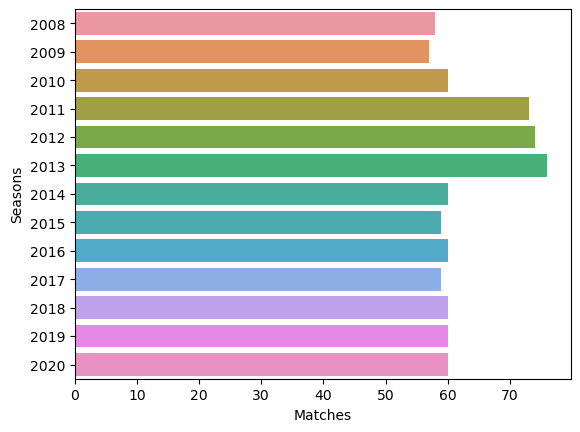

In [24]:
match_per_season = df_1.season.value_counts().reset_index().rename(columns={'index':'season','season':
                                                                           'matches'}).sort_values(by = 'season')

sns.countplot(y = df_1.season)
plt.xlabel('Matches')
plt.ylabel('Seasons');

Now we know that highest number of matches were played in a single year was **2013**  and lowest matches are in **2008**

Lets merge the two datasets so it'll easy for us to do analysis on data

In [25]:
season_data = df_1[['id','season']].merge(df_2, left_on='id', right_on='id', how = 'left').drop(columns='id',axis = 1)

In [26]:
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,over_category
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Mid Overs
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Mid Overs
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Mid Overs
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Mid Overs
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Mid Overs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,Mid Overs
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,Mid Overs
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians,Mid Overs
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,Mid Overs


# **SCORE PER SEASON**

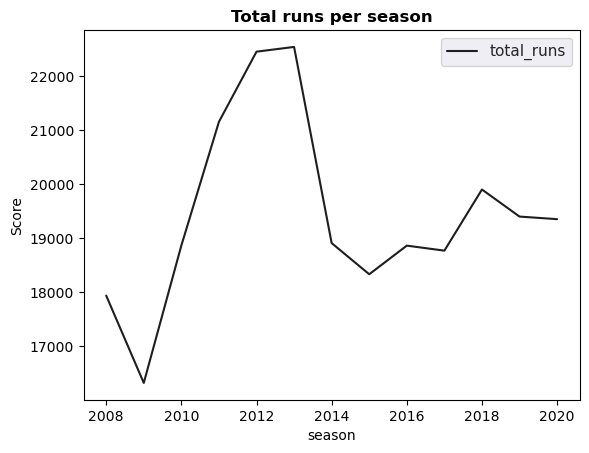

In [27]:
season_score = season_data.groupby('season')['total_runs'].sum().reset_index()
p = season_score.set_index('season')
ax = plt.axes()
ax.set(facecolor = 'white')
sns.set(rc= {"figure.figsize":(6,6)})
sns.set_style("darkgrid")
sns.lineplot(data = p, palette='icefire')
plt.ylabel('Score', fontsize = 10)
plt.title('Total runs per season', fontsize = 12, fontweight = 'bold');

Because highest no. of matches were played in 2013 , so Highest Runs Scored in a single year is also in 2013

# **AVERAGE RUNS PER MATCH**

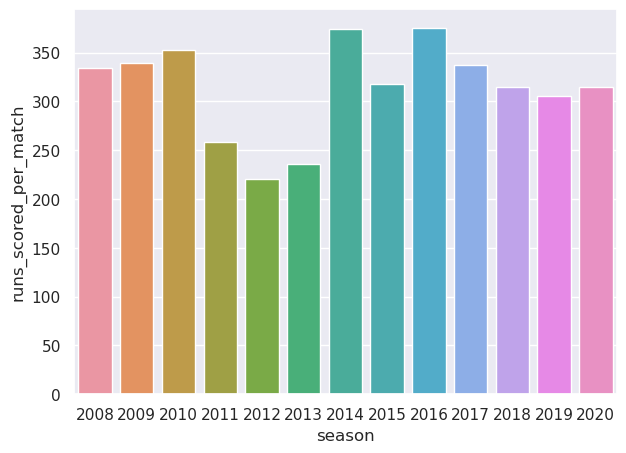

In [28]:
runs_per_season = pd.concat([match_per_season, season_score.iloc[:,1]], axis = 1)
runs_per_season['runs_scored_per_match'] = runs_per_season['total_runs'] / runs_per_season['matches']
runs_per_season.set_index('season', inplace = True)

plt.figure(figsize=(7,5))

sns.barplot(x = runs_per_season.index, y = runs_per_season.runs_scored_per_match);


# **TOSS WON BY EACH TEAM**

Text(0.5, 0, 'No. of tosses won')

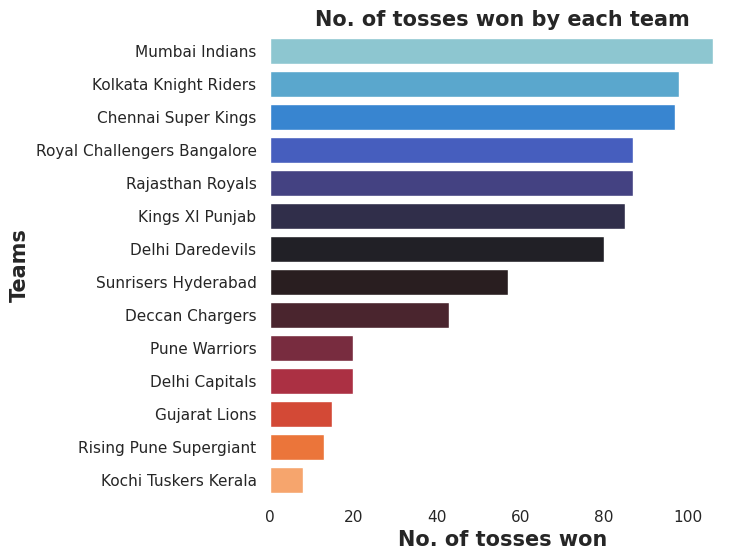

In [29]:
toss = df_1.toss_winner.value_counts()
toss

ax = plt.axes()
ax.set(facecolor='white')
sns.set(rc= {"figure.figsize":(8,6)}, style = 'darkgrid')
ax.set_title('No. of tosses won by each team', fontsize = 15, fontweight = 'bold')
sns.barplot(x = toss, y = toss.index, orient = 'h', palette='icefire', saturation=1)
plt.ylabel('Teams', fontsize = 15, fontweight = 'bold')
plt.xlabel('No. of tosses won', fontsize = 15, fontweight = 'bold')

**Mumbai Indians have won most Tosses In IPL**

# **HIGHEST RUN SCORERS THROUGHOUT ALL SEASONS**

These are the top 10 highest scoring batsmans

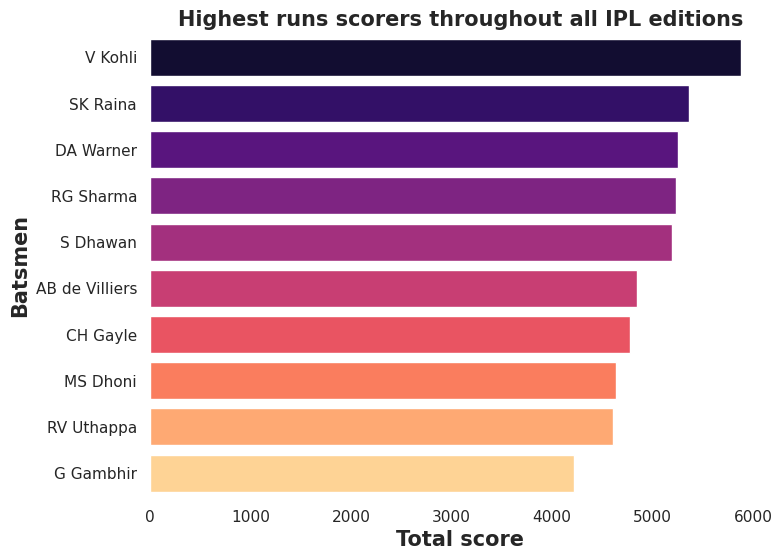

In [30]:
top_bats = season_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).reset_index()
ax = plt.axes()
ax.set(facecolor='white')
sns.set(rc= {"figure.figsize":(8,5)}, style = 'darkgrid')
ax.set_title('Highest runs scorers throughout all IPL editions', fontsize = 15, fontweight = 'bold')
sns.barplot(x = top_bats['batsman_runs'], y = top_bats['batsman'], orient = 'h', palette='magma', saturation=1)
plt.ylabel('Batsmen', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total score', fontsize = 15, fontweight = 'bold');

**Virat Kohli** has the most runs in IPL

# **HIGHEST WICKET TAKERS THROUGHOUT ALL SEASONS**

Text(0.5, 0, 'Wickets taken')

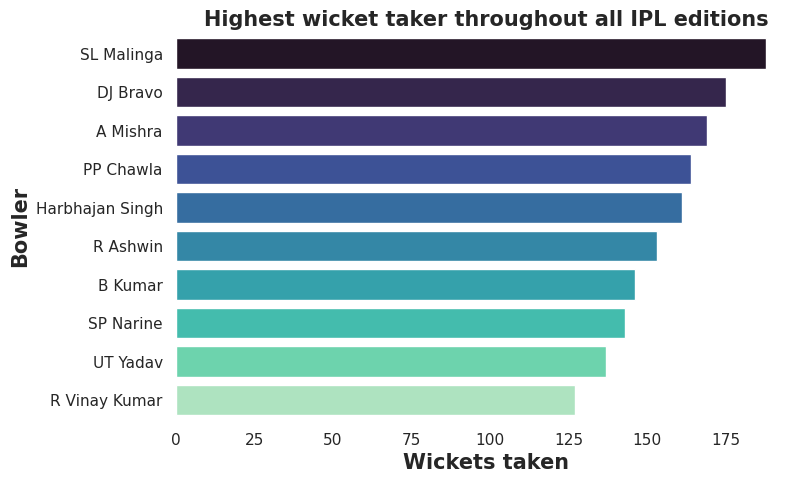

In [31]:
top_bols = season_data.groupby('bowler')['is_wicket'].sum().sort_values(ascending = False).head(10).reset_index()

ax = plt.axes()
ax.set(facecolor='white')
sns.set(rc= {"figure.figsize":(8,5)}, style = 'darkgrid')
ax.set_title('Highest wicket taker throughout all IPL editions', fontsize = 15, fontweight = 'bold')
sns.barplot(x = top_bols['is_wicket'], y = top_bols['bowler'], orient = 'h', palette='mako', saturation=1)
plt.ylabel('Bowler', fontsize = 15, fontweight = 'bold')
plt.xlabel('Wickets taken', fontsize = 15, fontweight = 'bold')

**Lasith Malinga** has the most wickets in IPL

### **NO. OF WINS BY EACH TEAM**

In [32]:
team_wins = df_1.winner.value_counts()
px.bar(y = team_wins, x = team_wins.index, labels = {'x': 'Teams','y': 'Total wins'})

<AxesSubplot:>

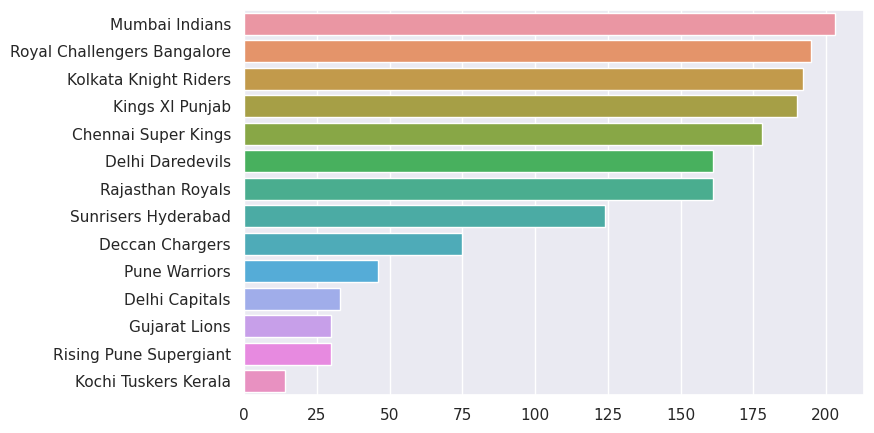

In [33]:
matches_per_team = (df_1.team2.value_counts() + df_1.team1.value_counts()).sort_values(ascending=False)
sns.barplot(x = matches_per_team.values, y = matches_per_team.index)

Now we can see that there is not uniform distribution of no. of matches of each team. So it wouls be more better metrics to compute **winning percentage of each team**. 

# **WINNING PERCENTAGE OF EACH TEAM**

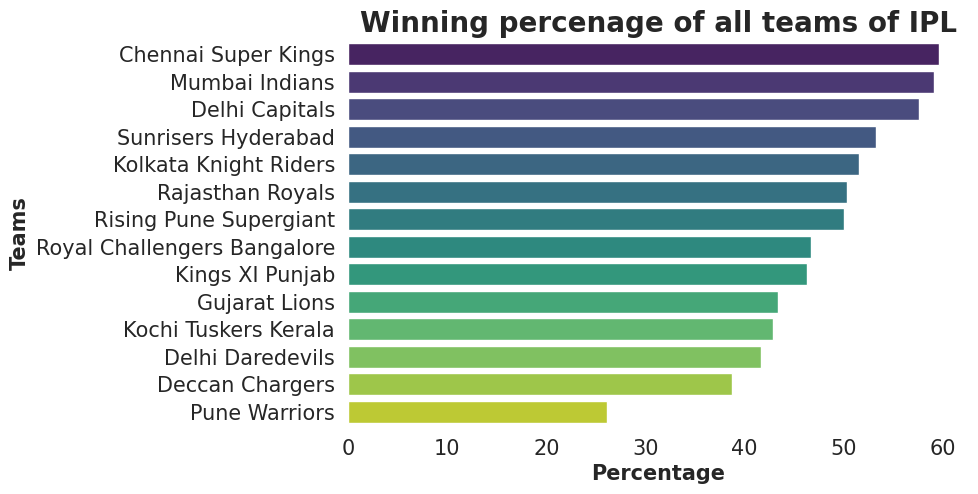

In [34]:
matches_per_team = matches_per_team.sort_index()
team_wins = team_wins.sort_index()
winning_percentage = team_wins / matches_per_team * 100
winning_percentage = winning_percentage.sort_values(ascending=False)

ax = plt.axes()
ax.set(facecolor = 'white')
sns.set_style("darkgrid")
sns.barplot(y = winning_percentage.index, x = winning_percentage, palette='viridis')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.title('Winning percenage of all teams of IPL', fontsize = 20, fontweight = 'bold')
plt.xlabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.ylabel('Teams', fontsize = 15, fontweight = 'bold');

Now we have come to know that chennai super kings have highest winning percentage and mumbai indians have 2nd highest winning percentage.

# **DOES WINNING A TOSS MEAN WINNING A MATCH?**

In [35]:
#Encoding the toss winner and winner column for correlation analysis

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
encoded_toss_winner = Le.fit_transform(df_1['toss_winner'])
encoded_winner = Le.fit_transform(df_1['winner'])

px.scatter(x = encoded_winner, y = encoded_toss_winner)

<AxesSubplot:>

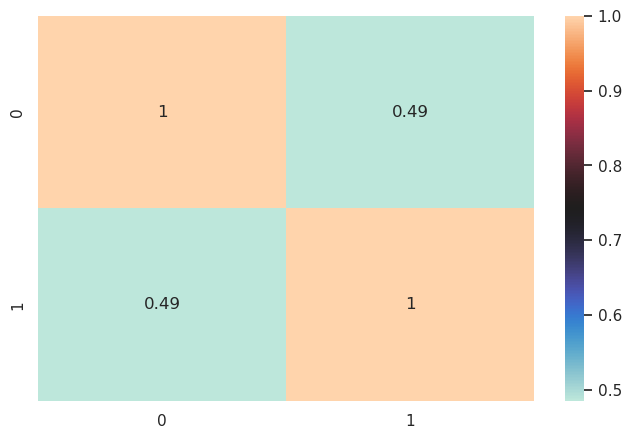

In [36]:
sns.heatmap(np.corrcoef(encoded_toss_winner,encoded_winner), annot = True, cmap = "icefire")

By observing correlation between winning toss and winning match , we can say that ***winning a match in IPL doesn't highly depends on just winng toss. There are also many other factors.***

# **TOP 10 MOST PLAYER OF THE MATCHES**

In [37]:
import plotly.graph_objects as go

top_player_of_matches = df_1.player_of_match.value_counts().head(10)
fig = go.Figure(data = go.Pie(labels = top_player_of_matches.index,values= top_player_of_matches.values))
fig.update_traces(hoverinfo='percent+label', textinfo='value+label', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
                , line=dict(color='#000000', width=2)))
fig.update_layout(
    title="TOP 10 MOST PLAYER OF THE MATCHES",
    legend_title="Players",
    font=dict(
    size = 13)
  )

# **TOSS DECISIONS**

<AxesSubplot:xlabel='season', ylabel='count'>

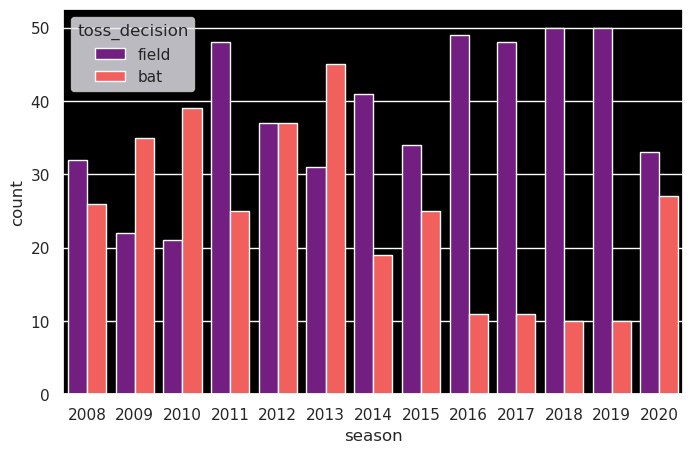

In [38]:
ax = plt.axes()
ax.set(facecolor = 'black')
sns.countplot(x = 'season',data = df_1, hue = 'toss_decision',
              palette='magma', orient=0, saturation=2)

# **WINNING METHODS THROUGH THE YEARS**

<AxesSubplot:xlabel='season', ylabel='count'>

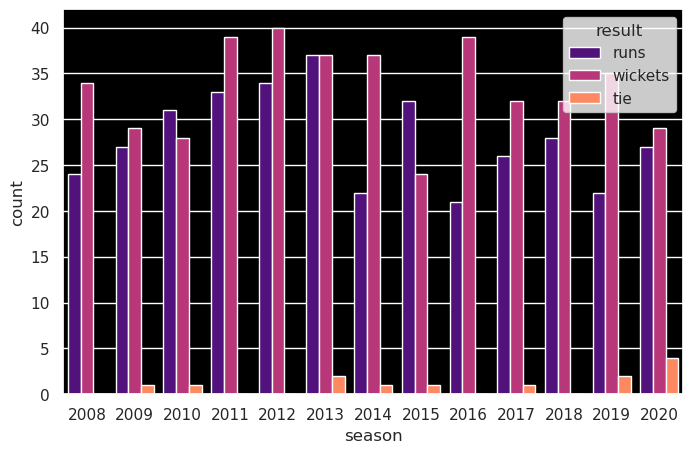

In [39]:
ax = plt.axes()
ax.set(facecolor = 'black')
sns.set(rc= {"figure.figsize":(10,8)}, style = 'whitegrid')
sns.countplot(x = 'season',data = df_1, hue = 'result',
              palette='magma', orient=0, saturation=2)

Now it's making sense that why there are field decisions because in many years more results are winning by wickets i-e choosing field and then win chasing the target by some wickets remaining

# **STADIUM BEST FOR WINNING BY WICKETS**

In [40]:
df_1.venue[df_1.result == 'wickets'].value_counts().head(5)

Eden Gardens                                 45
Feroz Shah Kotla                             37
Wankhede Stadium                             37
M Chinnaswamy Stadium                        36
Rajiv Gandhi International Stadium, Uppal    35
Name: venue, dtype: int64

# **STADIUM BEST FOR WINNING BY RUNS**

In [41]:
df_1.venue[df_1.result == 'runs'].value_counts().head(5)

Feroz Shah Kotla                             35
Wankhede Stadium                             35
MA Chidambaram Stadium, Chepauk              34
Eden Gardens                                 32
Rajiv Gandhi International Stadium, Uppal    28
Name: venue, dtype: int64

# **DOES HOMETOWN MAKE ANY DIFFERENCE?**

In [42]:
# winning at home town
list1 = []
for team in df_1.team1.unique():
    list1.append(f'{team} - {df_1.venue[(df_1.toss_winner == team) & (df_1.winner == team)].mode()}')
for a in list1:
    print(a)

Royal Challengers Bangalore - 0    M Chinnaswamy Stadium
dtype: object
Kings XI Punjab - 0    Punjab Cricket Association Stadium, Mohali
dtype: object
Delhi Daredevils - 0    Feroz Shah Kotla
dtype: object
Mumbai Indians - 0    Wankhede Stadium
dtype: object
Kolkata Knight Riders - 0    Eden Gardens
dtype: object
Rajasthan Royals - 0    Sawai Mansingh Stadium
dtype: object
Deccan Chargers - 0                   Barabati Stadium
1         Dr DY Patil Sports Academy
2                   Feroz Shah Kotla
3                          Kingsmead
4    MA Chidambaram Stadium, Chepauk
5                    SuperSport Park
dtype: object
Chennai Super Kings - 0    MA Chidambaram Stadium, Chepauk
dtype: object
Kochi Tuskers Kerala - 0          Feroz Shah Kotla
1    Holkar Cricket Stadium
2             Nehru Stadium
3          Wankhede Stadium
dtype: object
Pune Warriors - 0    Subrata Roy Sahara Stadium
dtype: object
Sunrisers Hyderabad - 0    Rajiv Gandhi International Stadium, Uppal
dtype: object
Guj

***YES, Hometown make the differnce as RCB KKR K XI PUNJAB and rest winning most matches in hometown***

In [43]:
# best chasing team
df_1.winner[df_1.result != 'runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [44]:
# best defending team
df_1.winner[df_1.result != 'wickets'].mode()

0    Mumbai Indians
dtype: object

# **COMPARISON OF TWO  PLAYERS**

In [45]:
def runs_classification(df,batsman):
    temp_df=  df[(df.batsman == batsman)  & (df.batsman_runs != 0)].batsman_runs.value_counts().sort_index()
    return temp_df


In [46]:
def str_rate_through_over(df,player):
    temp_df = df[df.batsman == player].groupby(["over", "over_category"])['batsman_runs'].sum().reset_index()
    balls = df[(df.batsman == player) & (df.extras_type != 'wides')].groupby('over').ball.count()
    temp_df['balls'] = balls
    temp_df['average_str'] = round((temp_df['batsman_runs'] / temp_df['balls']) * 100,1) 
    return temp_df


In [47]:
def subplots(df,batsman1, batsman2):
    
    from plotly.subplots import make_subplots
    fig1 = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=(f"{batsman1}", f"{batsman2}"))
    fig2 = make_subplots(rows=1, cols=2, subplot_titles=(f"{batsman1}", f"{batsman2}"))
    
    print(f"                                                                   {batsman1} vs {batsman2}  ")
    print("                                      ----------------------------------------------------------------------------                                                            ")
     
     #runs
    
    print("RUNS IN IPL: \n")
    print(f"{batsman1}:  {df[df.batsman == batsman1].batsman_runs.sum()}🔺         {batsman2}:  {df[df.batsman == batsman2].batsman_runs.sum()}🔻\n")
     
      #Matches of players
    print("MATCHES PLAYED: \n")
    print(f"{batsman1}:  {df[df.batsman == batsman1].id.nunique()}🔺          {batsman2}:  {df[df.batsman == batsman2].id.nunique()}🔻\n")
    
      #strike rate
    print("STRIKE RATE: \n")
    print(f"{batsman1}:  {round((df[(df.batsman == batsman1)].batsman_runs.sum() / df[(df.batsman == batsman1) & (df.extras_type != 'wides')].ball.count()) * 100, 2)}🔻       {batsman2}: {round((df[(df.batsman == batsman2)].batsman_runs.sum() / df[(df.batsman == batsman2) & (df.extras_type != 'wides')].ball.count())* 100 ,2)}🔺\n")
    
      #average   
    print("AVERAGE RUNS IN AN INNINGS: \n")
    dismissal1 = df[(df.batsman == batsman1) & (df.player_dismissed.isnull() == False)].player_dismissed.count()
    score1 = df[df.batsman == batsman1].batsman_runs.sum()
    dismissal2 = df[(df.batsman == batsman2) & (df.player_dismissed.isnull() == False)].player_dismissed.count()
    score2 = df[df.batsman == batsman2].batsman_runs.sum()
    
    print(f"{batsman1}: {round(score1 / dismissal1, 2)}🔻         {batsman2}:  {round(score2 / dismissal2, 2)}🔺\n")
    


    
      # runs classififcation
    batsman_one = runs_classification(df, batsman1)
    batsman_two = runs_classification(df, batsman2)
    fig1.add_trace(go.Pie(labels = batsman_one.index, values = batsman_one.values), row = 1, col= 1)
    fig1.add_trace(go.Pie(labels = batsman_two.index, values = batsman_two.values), row = 1, col= 2)
    
    fig1.update_traces(hoverinfo='percent+label', textinfo='value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
                , line=dict(color='#000000', width=2)))
    
    fig1.update_layout(
    title="Runs Classification",
    legend_title="RUNS",
    font=dict(
    size = 13),width = 1200, height = 500)
    fig1.show()
    
    
      # strike over the overs
    batsman_one = str_rate_through_over(df, batsman1)
    batsman_two = str_rate_through_over(df, batsman2)
    fig2.append_trace(go.Bar(name = "Powerplay",x = batsman_one.query("over < 5").over, y = batsman_one.query("over < 5").average_str, legendgroup = '1'),row = 1, col= 1)
    fig2.append_trace(go.Bar(name = "Mid Overs",x = batsman_one.query("over >= 5 and over <15").over, y = batsman_one.query("over >= 5 and over <15").average_str, legendgroup = '1'),row = 1, col= 1)
    fig2.append_trace(go.Bar(name = "Death Overs",x = batsman_one.query("over >= 15").over, y = batsman_one.query("over >= 15").average_str, legendgroup = '1'),row = 1, col= 1)
    fig2.update_yaxes(range = [0,300], title_text = "STRIKE RATE")
    fig2.update_xaxes(title_text = "OVERS")
    
    fig2.append_trace(go.Bar(name = "Powerplay",x = batsman_two.query("over < 5").over, y = batsman_two.query("over < 5").average_str, legendgroup = '2'),row = 1, col= 2)
    fig2.append_trace(go.Bar(name = "Mid Overs",x = batsman_two.query("over >= 5 and over <15").over, y = batsman_two.query("over >= 5 and over <15").average_str, legendgroup = '2'),row = 1, col= 2)
    fig2.append_trace(go.Bar(name = "Death Overs",x = batsman_two.query("over >= 15").over, y = batsman_two.query("over >= 15").average_str, legendgroup = '2'),row = 1, col= 2)
    
    
    fig2.update_layout(
    title="AVERAGE STRIKE RATE THROUGHT THE OVERS",
    legend_title="OVER CATEGORY",
    font=dict(
    size = 13),width = 1200, height = 400)
    fig2.update_layout(
    )
    
    fig2.show()

subplots(df_2, "V Kohli", "AB de Villiers")    

                                                                   V Kohli vs AB de Villiers  
                                      ----------------------------------------------------------------------------                                                            
RUNS IN IPL: 

V Kohli:  5878🔺         AB de Villiers:  4849🔻

MATCHES PLAYED: 

V Kohli:  184🔺          AB de Villiers:  156🔻

STRIKE RATE: 

V Kohli:  130.74🔻       AB de Villiers: 151.91🔺

AVERAGE RUNS IN AN INNINGS: 

V Kohli: 36.06🔻         AB de Villiers:  42.54🔺

